In [1]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [2]:
# Assuming 'movieId' is the column representing movie IDs in the 'ratings' dataset
ratings_count = ratings['movieId'].value_counts()

# Get the movie ID with the maximum number of ratings
max_ratings_movie_id = ratings_count.idxmax()

# Find the movie details in the 'movies' dataset using the max_ratings_movie_id
max_ratings_movie = movies[movies['movieId'] == max_ratings_movie_id]

# Print the result
print(f"The movie with the maximum number of user ratings is:")
print(max_ratings_movie[['title', 'genres']])


The movie with the maximum number of user ratings is:
                   title                    genres
314  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [3]:
# Assuming 'movieId' is the column representing movie IDs and 'title' is the column representing movie titles in the 'movies' dataset
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags for the specific movieId
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

# Print the result
print("Tags submitted by users for 'Matrix, The (1999)':")
print(matrix_tags['tag'])


Tags submitted by users for 'Matrix, The (1999)':
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [4]:
# Assuming 'movieId' is the column representing movie IDs and 'title' is the column representing movie titles in the 'movies' dataset
terminator2_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter ratings for the specific movieId
terminator2_ratings = ratings[ratings['movieId'] == terminator2_movie_id]

# Calculate the average user rating
average_rating = terminator2_ratings['rating'].mean()

# Print the result
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


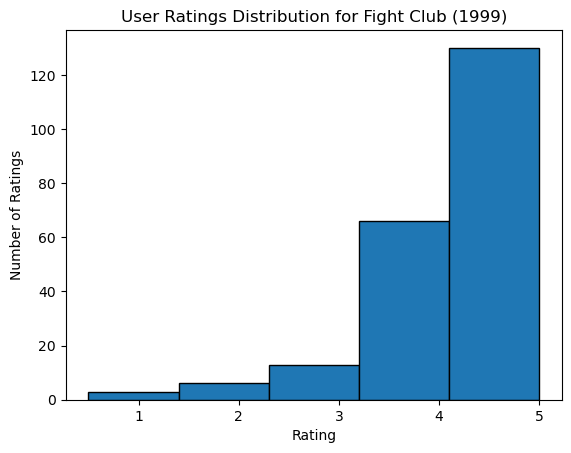

In [5]:
import matplotlib.pyplot as plt

# Assuming 'movieId' is the column representing movie IDs and 'title' is the column representing movie titles in the 'movies' dataset
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for the specific movieId
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]

# Plot the histogram
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [7]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
ratings_grouped = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Flatten the multi-level column index
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter only those movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]


In [8]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_data[filtered_data['rating_mean'] == filtered_data['rating_mean'].max()]

# Print the result
print("The most popular movie based on average user ratings is:")
print(most_popular_movie[['title', 'rating_mean']])


The most popular movie based on average user ratings is:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [9]:
# Sort the filtered data based on the number of user ratings in descending order
top_popular_movies = filtered_data.sort_values(by='rating_count', ascending=False).head(5)

# Print the result
print("Top 5 popular movies based on the number of user ratings are:")
print(top_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on the number of user ratings are:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [10]:
# Filter Sci-Fi movies from the filtered data
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Sort the Sci-Fi movies based on the number of user ratings in descending order
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]

# Print the result
print("The third most popular Sci-Fi movie based on the number of user ratings is:")
print(third_most_popular_sci_fi[['title', 'rating_count']])


The third most popular Sci-Fi movie based on the number of user ratings is:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [11]:
!pip install requests beautifulsoup4